In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [184]:
#Lectura del CSV bike_train

df = pd.read_excel('bike_train.xlsx')

Análisis exploratorio de los datos

In [204]:
#Como weathersit y season son variables categóricas, voy a utilizar dummies para su tratamiento

In [205]:
clima=pd.get_dummies(df.weathersit)
clima=clima.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  
estacion=pd.get_dummies(df.season)
estacion=estacion.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})  #todo 0 es primavera

In [206]:
df= df.drop(["season", "weathersit"],axis=1)
df=pd.concat([df, clima, estacion], axis=1)

In [207]:
df.corr().loc["cnt"].sort_values()

hum                  -0.303672
estacion_primavera   -0.211014
clima_nieve          -0.136480
clima_nublado        -0.045067
holiday              -0.030304
estacion_invierno    -0.017715
clima_lluvia         -0.008802
weekday               0.022618
workingday            0.025132
mnth                  0.073431
estacion_otoño        0.090982
windspeed             0.094791
clima_despejado       0.123063
estacion_verano       0.153673
yr                    0.156960
instant               0.229814
atemp                 0.395234
temp                  0.395743
hr                    0.396698
casual                0.702414
registered            0.968540
cnt                   1.000000
Name: cnt, dtype: float64

In [208]:
X=df.drop(['dteday','cnt', 'instant', 'yr', 'mnth', 'weekday', 'workingday', 'holiday', 'atemp', 'casual', 'registered'], axis=1)

In [209]:
y=df.cnt

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [211]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [212]:
y_test_pred = lr.predict(X_test)
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de test: 120.09371884998224


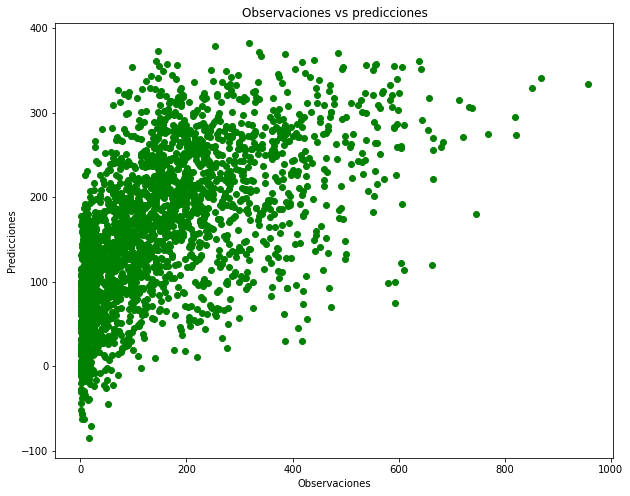

In [213]:
plt.figure(figsize = (10,8))
plt.axes()
plt.scatter(y_test, y_test_pred,  color='green')
plt.gca().update(dict(title='Observaciones vs predicciones', xlabel='Observaciones', ylabel='Predicciones'))

plt.show()

A continuación voy a predecir la variable cnt en el dataset bike_test

In [214]:
df2=pd.read_excel("bike_test.xlsx")

In [215]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


In [216]:
clima2=pd.get_dummies(df2.weathersit)

In [217]:
clima2=clima2.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  

In [218]:
estacion2=pd.get_dummies(df2.season)

In [219]:
estacion2=estacion2.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})

In [220]:
df2= df2.drop(["season", "weathersit"],axis=1)
df2=pd.concat([df2, clima2, estacion2], axis=1)

In [221]:
X_test2=df2.drop(['dteday', 'instant', 'yr', 'mnth', 'weekday', 'atemp', 'workingday', 'holiday'], axis=1)

In [222]:
X_test2["clima_lluvia"]=0

In [223]:
y_test_pred2 = lr.predict(X_test2)

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [224]:
predicciones=pd.DataFrame(y_test_pred2)

In [225]:
predicciones=predicciones.rename(columns={0:"pred"})

In [226]:
predicciones.to_csv('dfrankram.csv', index=False)